<a href="https://colab.research.google.com/github/S460201/Testmod/blob/master/Testmod_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing packages
import pandas as pd
import numpy as np

In [ ]:
# Importing the dataset
train = pd.read_csv("/content/drive/MyDrive/Samplemod/NB Normal.csv")
train['Fault'] = 0
test = pd.read_csv("/content/drive/MyDrive/Samplemod/IR - 7 Fault.csv")
test['Fault'] = 1

In [ ]:
dataset = train.append(test)
dataset

,DE,FE,Fault
0,0.064254,0.038625,0
1,0.063002,0.096769,0
2,-0.004381,0.127382,0
3,-0.035882,0.144640,0
4,-0.023991,0.086702,0
...,...,...,...
121150,0.135958,-0.047255,1
121151,-0.083167,-0.070882,1
121152,0.391469,-0.181005,1
121153,0.185501,0.136011,1


In [ ]:
X = dataset.iloc[:, 0:2].values
y = dataset.iloc[:, 2]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state
= 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
y_train

104802    0
7         1
57714     1
15253     0
78974     0
         ..
55808     1
117952    0
52530     1
43567     0
78185     1
Name: Fault, Length: 193848, dtype: int64

In [ ]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [ ]:
classifier.score(X_test, y_test)


0.8546283686187116

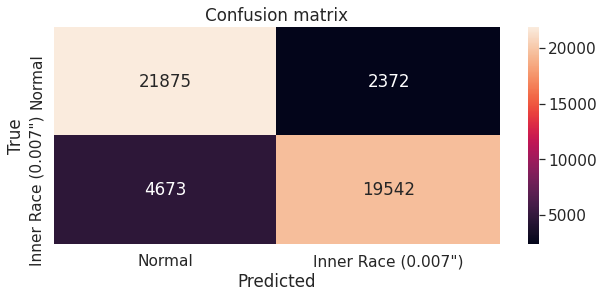

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
index = ['Normal','Inner Race (0.007")'] 
columns = ['Normal','Inner Race (0.007")'] 
cm_df = pd.DataFrame(cm,columns,index) 
plt.figure(figsize=(10,4))
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm_df, annot=True, fmt='g') # font size
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred, target_names=['Normal','Inner Race (0.007")'
])
print(cr)

                     precision    recall  f1-score   support

             Normal       0.82      0.90      0.86     24247
Inner Race (0.007")       0.89      0.81      0.85     24215

           accuracy                           0.85     48462
          macro avg       0.86      0.85      0.85     48462
       weighted avg       0.86      0.85      0.85     48462

